In [2]:
import subprocess
import pandas as pd
from Bio import SeqIO
import h5py
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
tox = pd.read_excel("../out/data/blast_embed_tox.xlsx").drop(columns='Unnamed: 0')
tox

,Entry,Protein names,Organism,Protein families,Sequence,Signal peptide,Sequence_noSP,new_protein_family,shortened_label,manual_labels,mmseqs2_label,embed_label,combined
0,Q5Y4W9,U2-agatoxin-Ao1q (U2-AGTX-Ao1q) (Agel_16),Agelena orientalis (Funnel-web spider),Neurotoxin 01 (U2-agtx) family,MRSIISLLLISAMVFSMIAAVPEEEGLQLSEDERGGCLPHNRFCNA...,"SIGNAL 1..20; /evidence=""ECO:0000255""",VPEEEGLQLSEDERGGCLPHNRFCNALSGPRCFSGLRCKELSIWDS...,Agatoxin family,AGTX,0,28,30,"[0.011789458803832531, -0.026637909933924675, ..."
1,Q5Y4V1,U3-agatoxin-Ao1h (U3-AGTX-Ao1h) (Mu-2Aaga_09),Agelena orientalis (Funnel-web spider),"Neurotoxin 07 (Beta/delta-agtx) family, 03 (ag...",MRAIISLLLISTMVFGVIEAVSVQKSLKIFEGERGDCVGESQQCAD...,"SIGNAL 1..20; /evidence=""ECO:0000255""",VSVQKSLKIFEGERGDCVGESQQCADWSGPYCCKGYYCTCQYFPKC...,Agatoxin family,AGTX,0,28,30,"[0.07037654519081116, -0.006755341775715351, 0..."
2,Q5Y4V4,U3-agatoxin-Ao1e (U3-AGTX-Ao1e) (Mu-2Aga_06),Agelena orientalis (Funnel-web spider),"Neurotoxin 07 (Beta/delta-agtx) family, 03 (ag...",MRTIISLLLLSAMVFAVIEAISLEEGLQLFEGERGCVGENQQCADW...,"SIGNAL 1..20; /evidence=""ECO:0000255""",ISLEEGLQLFEGERGCVGENQQCADWAGPHCCSGYYCTCRYFPKCI...,Agatoxin family,AGTX,0,28,30,"[0.06326459348201752, -0.030541636049747467, 0..."
3,Q5Y4V0,U3-agatoxin-Ao1i (U3-AGTX-Ao1i) (Mu-2Aaga_10),Agelena orientalis (Funnel-web spider),"Neurotoxin 07 (Beta/delta-agtx) family, 03 (ag...",MRTIISLLLLSAMVFAEIEAISLEEGLQLFEGERGCVGENQQCANW...,"SIGNAL 1..20; /evidence=""ECO:0000255""",ISLEEGLQLFEGERGCVGENQQCANWAGPHCCSGYYCTCRYFPKCI...,Agatoxin family,AGTX,0,28,30,"[0.04777107760310173, -0.008298294618725777, 0..."
4,Q5Y4U9,U3-agatoxin-Ao1j (U3-AGTX-Ao1j) (Mu-2Aaga_11),Agelena orientalis (Funnel-web spider),"Neurotoxin 07 (Beta/delta-agtx) family, 03 (ag...",MRTIISLLLLSAMVFAVIEAISLEEGLQLFEGERGCVGENQQCADW...,"SIGNAL 1..20; /evidence=""ECO:0000255""",ISLEEGLQLFEGERGCVGENQQCADWARPHCCSGYYCTCRYFPKCI...,Agatoxin family,AGTX,0,28,30,"[0.044718291610479355, -0.013048099353909492, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,B1P1G3,U21-theraphotoxin-Cg1a 3 (U21-TRTX-Cg1a) (Jing...,Chilobrachys guangxiensis (Chinese earth tiger...,"Neurotoxin 10 (Hwtx-1) family, 05 (F4a) subfamily",MKVSVLITLAVLGVMFLLTSAEERGSDQMDSPAWLKSMERIFQSEE...,"SIGNAL 1..21; /evidence=""ECO:0000255""",EERGSDQMDSPAWLKSMERIFQSEERECRWLFGGCEKDSDCCEHLG...,NaN,NaN,-1,34,30,"[-0.0034503983333706856, -0.021120255813002586..."
5177,B1P1G2,U21-theraphotoxin-Cg1a 1 (U21-TRTX-Cg1a) (Jing...,Chilobrachys guangxiensis (Chinese earth tiger...,"Neurotoxin 10 (Hwtx-1) family, 05 (F4a) subfamily",MKVSVLITLAVLGVMFLLTSAEERGSDQMDSPAWLKSMEIIFQSEE...,"SIGNAL 1..21; /evidence=""ECO:0000255""",EERGSDQMDSPAWLKSMEIIFQSEERECRWLFGGCEKDSDCCEHLG...,NaN,NaN,-1,34,30,"[-0.0007040849886834621, -0.015479594469070435..."
5178,P56676,Mu/omega-theraphotoxin-Hs1a (Mu/omega-TRTX-Hs1...,Cyriopagopus schmidti (Chinese bird spider) (H...,"Neurotoxin 10 (Hwtx-1) family, 23 (HwTx-I) sub...",MRASMFLALAGLVLLFVVCYASESEEKEFPRELLFKFFAVDDFKGE...,"SIGNAL 1..21; /evidence=""ECO:0000255""",SESEEKEFPRELLFKFFAVDDFKGEERACKGVFDACTPGKNECCPN...,NaN,NaN,-1,36,24,"[0.04243668168783188, -0.0048881047405302525, ..."
5179,D2Y1Z2,Mu-theraphotoxin-Hhn2q (Mu-TRTX-Hhn2q) (Hainan...,Cyriopagopus hainanus (Chinese bird spider) (H...,"Neurotoxin 10 (Hwtx-1) family, 51 (Hntx-8) sub...",MKASMFLALAGLVLLFVVGYASESEEKEFPRELLSKIFAVDDFKGE...,"SIGNAL 1..21; /evidence=""ECO:0000255""",SESEEKEFPRELLSKIFAVDDFKGEERGCKGFGDSCTPEKNECCPN...,NaN,NaN,-1,36,24,"[0.03860948979854584, -0.008861410431563854, 0..."


In [4]:
tox['new_protein_family'].value_counts()

new_protein_family
Snake three-finger toxin family                       479
Long scorpion toxin superfamily                       339
Phospholipase A2 family                               275
Conotoxin O1 superfamily                              189
Peptidase S1 family                                   145
Snaclec family                                        143
Venom metalloproteinase (M12B) family                 115
Venom Kunitz-type family                              113
Short scorpion toxin superfamily                      113
Conotoxin T superfamily                               107
Neurotoxin 19 (CSTX) family 01-05                     104
Conotoxin A superfamily                               100
Conotoxin M superfamily                                91
Neurotoxin 14 (magi-1) family                          88
Neurotoxin 12 (Hwtx-2) family                          84
Disintegrin, Venom metalloproteinase (M12B) family     64
Neurotoxin 19 (CSTX) family 06-10                    

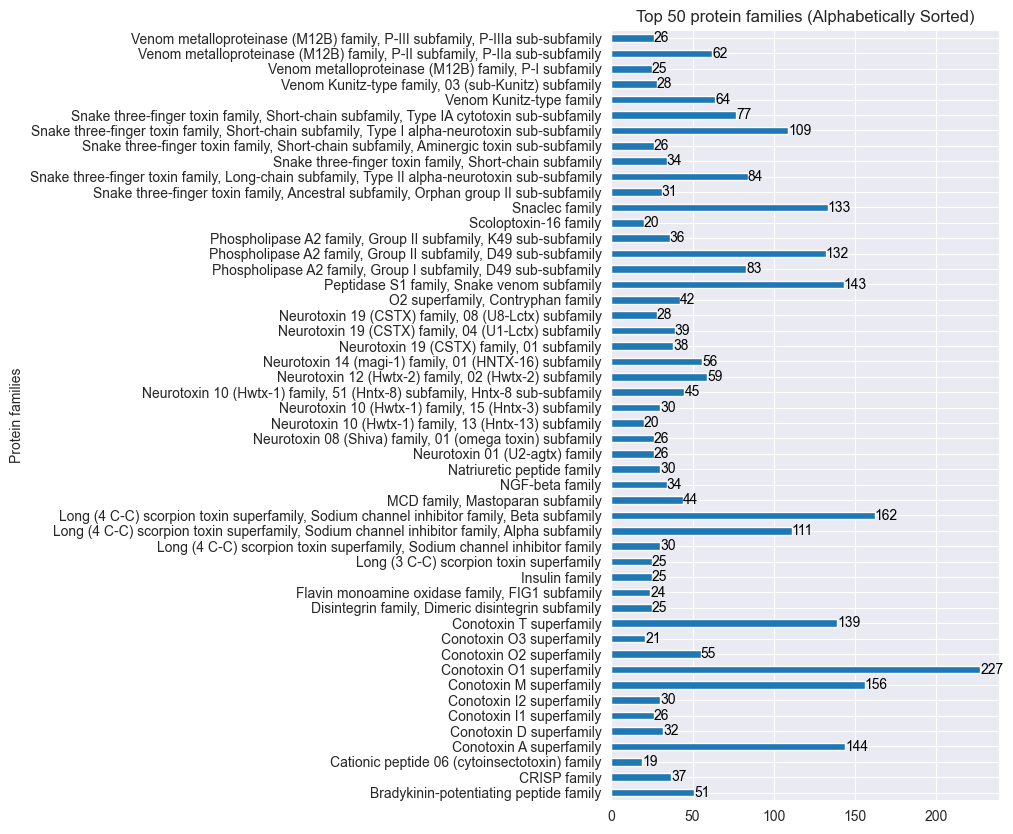

In [151]:
counts = tox['Protein families'].dropna().value_counts()

filtered_counts = counts[:50].sort_index()

ax = filtered_counts.plot(kind='barh', figsize=(5, 10), title="Top 50 protein families (Alphabetically Sorted)")

for index, value in enumerate(filtered_counts):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

plt.savefig("top50_pfams.png", dpi=200, bbox_inches='tight')

In [152]:
counts

Protein families
Conotoxin O1 superfamily                                                                        227
Long (4 C-C) scorpion toxin superfamily, Sodium channel inhibitor family, Beta subfamily        162
Conotoxin M superfamily                                                                         156
Conotoxin A superfamily                                                                         144
Peptidase S1 family, Snake venom subfamily                                                      143
                                                                                               ... 
Venom metalloproteinase (M12B) family, P-III subfamily, P-IIIe sub-subfamily                      1
Neurotoxin 10 (Hwtx-1) family, 43 (Jztx-49) subfamily                                             1
Limacoditoxin-22 family                                                                           1
Short scorpion toxin superfamily, Potassium channel inhibitor family, Alpha-KTx 22 

In [153]:
bins = [0, 5, 11, 51, float('inf')] 
labels = ['< 5', '5 - 10', '11 - 50', '> 50'] 

# Categorize protein families based on their sample counts
counts['category'] = pd.cut(counts, bins=bins, labels=labels, right=False)

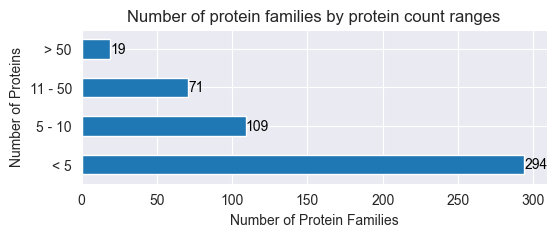

In [154]:
category_counts = counts['category'].value_counts().sort_index()
ax = category_counts.plot(kind='barh', figsize=(6, 2), title="Number of protein families by protein count ranges")

for index, value in enumerate(category_counts):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

plt.ylabel("Number of Proteins")
plt.xlabel("Number of Protein Families")

plt.savefig("protein_families_distribution.png", dpi=200, bbox_inches='tight')

In [155]:
category_counts

count
< 5        294
5 - 10     109
11 - 50     71
> 50        19
Name: count, dtype: int64

In [156]:
# Get unique protein families
unique_proteins = tox['Protein families'].unique()

# Sort them alphabetically
sorted_proteins = sorted(map(str, unique_proteins))

# Print each one on a new line
print("\n".join(sorted_proteins))
print(len(tox['Protein families'].unique()))

AB hydrolase superfamily, Lipase family
ATP:guanido phosphotransferase family
AVIT (prokineticin) family
Actinoporin family, Conoidea subfamily
Ant myrmeciitoxin-01 family
Arthropod phospholipase D family, Class I subfamily
Arthropod phospholipase D family, Class II subfamily
Arthropod phospholipase D family, Class II subfamily, Class IIa sub-subfamily
Arthropod phospholipase D family, Class II subfamily, Class IIb sub-subfamily
Asilidin-1 family
Asilidin-12 family
Beta-defensin family, Helofensin subfamily
Bradykinin inhibitor peptide family
Bradykinin-potentiating peptide family
Bradykinin-potentiating peptide family; Bradykinin inhibitor peptide family; Natriuretic peptide family
Bradykinin-potentiating peptide family; Natriuretic peptide family
Bradykinin-potentiating peptide family; PHpG family; Natriuretic peptide family
Bradykinin-related peptide family
CART family
CRISP family
CRISP family, Venom allergen 5-like subfamily
Cationic peptide 01 (latrotoxin) family, 03 (alpha-latro

In [7]:
def create_fasta(df, output_file):
    with open(output_file, 'w') as f:
        for _, row in df.iterrows():
            f.write(f">{row['identifier']}\n")
            f.write(f"{row['Sequence']}\n")
            
def read_fasta_to_df(file_path):
    records = SeqIO.parse(file_path, "fasta")
    return pd.DataFrame([(rec.id, str(rec.seq)) for rec in records], columns=["identifier", "Sequence"])

#create_fasta(tox, "../data/blast_embed_tox.fasta")

In [4]:
#nontox = read_fasta_to_df("../data/nontox_all.fasta")
#nontox['identifier'] = nontox['identifier'].apply(lambda x: x.split('|')[1].strip())
#nontox

mmseqs easy-cluster ../data/nontox_all.fasta ../dataset_generation/MMSeqs2/clustered_db ../dataset_generation/MMSeqs2/tmp -s 0.9 --max-seqs 200 --min-seq-id 0.5

In [5]:
data = [{"identifier": record.id, "Sequence": str(record.seq)} 
        for record in SeqIO.parse("../dataset_generation/MMSeqs2/clustered_nontox_rep_seq.fasta", "fasta")]

df = pd.DataFrame(data)
df['identifier'] = df['identifier'].apply(lambda x: x.split('|')[0].strip())
df

,identifier,Sequence
0,A0A044RE18,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...
1,A0A061ACU2,MTVPPLLKSCVVKLLLPAALLAAAIIRPSFLSIGYVLLALVSAVLP...
2,A0A061I403,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...
3,A0A096MJN4,MIKHFLEDNSDDAELSKFVKDFPGSEPCHPTESKTRVARPQILEPR...
4,A0A096MK47,MTSCVLAGSIETTPKVSPGDSEAKPLIFTFVPTLRRLPTHIQLADT...
...,...,...
21479,O08738,MTETDGFYKSREVFDPAEQYKMDHKRRGVALIFNHERFFWHLTLPE...
21480,O08759,MATACKRSPGESQSEDIEASRMKRAAAKHLIERYYHQLTEGCGNEA...
21481,O08762,MALARCVLAVILGALSVVARADPVSRSPLHRPHPSPPRSQHAHYLP...
21482,O08773,MPGKPKHLGVPNGRMVLAVSDGELTSTSGSQAQGEGRGSSLSIHSL...


In [9]:
#create_fasta(df, "../data/reduced_nontox.fasta")

pip## read in embeddings

In [8]:
with h5py.File("../data/nontox_all.h5", 'r') as h5_file:
    dfs = []
    
    for dataset in h5_file.keys():
        data = np.array(h5_file[dataset])  
        entry_name = dataset.split('|')[1]
        row = [entry_name] + data.tolist()
        dfs.append(row)
    
    columns = ['identifier'] + [f'{i}' for i in range(1024)]
    embeddings = pd.DataFrame(dfs, columns=columns)
    
#embeddings.set_index('Entry', inplace=True)
embeddings.head()

,identifier,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,A0A023FDY8,0.055756,0.018509,0.110962,0.020035,-0.055359,-0.015686,-0.044434,-0.150269,0.003416,...,-0.095520,-0.064270,0.009506,-0.104919,0.004574,-0.050354,0.001474,-0.038727,0.104858,0.012985
1,A0A023FFD0,0.020996,0.042725,0.129272,-0.020035,-0.052917,-0.022247,-0.032928,-0.133667,0.018112,...,-0.064514,-0.060883,0.019913,-0.101440,0.090637,-0.086914,-0.035431,-0.008286,0.112549,0.056763
2,A0A024QYT3,-0.011688,0.032654,0.138062,-0.013138,-0.003546,-0.093628,-0.023590,-0.115967,-0.039398,...,-0.090149,0.012611,0.002106,-0.074341,0.002439,0.011864,0.013969,0.024689,0.090088,0.037079
3,A0A024RBG1,0.057922,-0.003719,0.012596,0.005135,-0.004623,0.074890,-0.019867,-0.065735,0.016403,...,-0.070801,0.018082,0.045563,-0.037537,0.017456,0.011841,-0.017059,-0.056122,0.014297,-0.019943
4,A0A026W182,0.013809,0.009529,-0.008331,-0.010834,0.014641,0.028442,0.028198,-0.095154,-0.019806,...,-0.003447,-0.000072,-0.000091,-0.036591,0.043610,0.040741,0.002174,0.016006,0.039368,-0.002729


In [9]:
embeddings = embeddings[embeddings['identifier'].isin(df['identifier'])]

In [10]:
len(embeddings)

21484

In [11]:
embeddings['combined'] = embeddings.loc[:, embeddings.columns != 'identifier'].apply(lambda row: row.tolist(), axis=1)
embeddings.head()

,identifier,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,combined
0,A0A023FDY8,0.055756,0.018509,0.110962,0.020035,-0.055359,-0.015686,-0.044434,-0.150269,0.003416,...,-0.064270,0.009506,-0.104919,0.004574,-0.050354,0.001474,-0.038727,0.104858,0.012985,"[0.055755615234375, 0.0185089111328125, 0.1109..."
5,A0A044RE18,0.018661,0.037964,0.036102,0.014046,0.001611,0.045349,-0.019379,-0.034851,-0.012009,...,0.005444,-0.035828,0.014931,0.019348,0.009781,-0.009308,0.025879,0.028824,-0.058197,"[0.0186614990234375, 0.0379638671875, 0.036102..."
8,A0A060XQP6,0.108887,0.012177,0.170166,-0.082031,0.080750,-0.052094,-0.030029,-0.108215,-0.046295,...,-0.075623,0.006851,-0.107544,0.019806,-0.046692,0.006401,-0.010277,0.071960,0.106384,"[0.10888671875, 0.012176513671875, 0.170166015..."
9,A0A061ACU2,0.036407,-0.059845,0.014130,-0.008759,0.019669,0.015884,-0.027847,-0.080933,-0.012077,...,0.010010,0.012993,0.025681,0.025085,0.044556,0.016647,0.058472,0.097534,0.023346,"[0.036407470703125, -0.059844970703125, 0.0141..."
11,A0A061I403,0.061890,0.023849,-0.020020,0.017303,-0.015144,0.040039,-0.045685,-0.019409,0.007057,...,0.015640,-0.019302,-0.046661,0.004524,0.015930,-0.043640,-0.038269,-0.039948,0.022308,"[0.0618896484375, 0.0238494873046875, -0.02001..."


In [12]:
print(embeddings['combined'][0])

[0.055755615234375, 0.0185089111328125, 0.1109619140625, 0.0200347900390625, -0.05535888671875, -0.01568603515625, -0.04443359375, -0.1502685546875, 0.0034160614013671875, 0.0261077880859375, 0.0164642333984375, 0.015411376953125, 0.01532745361328125, -0.0028591156005859375, 0.0343017578125, -0.047607421875, -0.08001708984375, -0.027435302734375, 0.0036907196044921875, -0.006145477294921875, -0.0548095703125, -0.0172119140625, -0.1396484375, 0.035186767578125, 0.0291595458984375, 0.00968170166015625, 0.0261383056640625, 0.0267181396484375, -0.0305023193359375, 0.019073486328125, -0.051605224609375, 0.050750732421875, -0.1448974609375, -0.0242156982421875, -0.115966796875, -0.036590576171875, -0.04443359375, -0.037506103515625, 0.0210723876953125, -0.034576416015625, 0.01287078857421875, 0.02923583984375, 0.0287322998046875, 0.061004638671875, 0.0022983551025390625, 0.0195465087890625, -0.02105712890625, 0.025146484375, 0.073486328125, -0.0300445556640625, -0.01971435546875, -0.00669097

In [13]:
lol = embeddings[['identifier', 'combined']]
lol

,identifier,combined
0,A0A023FDY8,"[0.055755615234375, 0.0185089111328125, 0.1109..."
5,A0A044RE18,"[0.0186614990234375, 0.0379638671875, 0.036102..."
8,A0A060XQP6,"[0.10888671875, 0.012176513671875, 0.170166015..."
9,A0A061ACU2,"[0.036407470703125, -0.059844970703125, 0.0141..."
11,A0A061I403,"[0.0618896484375, 0.0238494873046875, -0.02001..."
...,...,...
52464,W6RTA4,"[0.1593017578125, 0.0726318359375, 0.033996582..."
52467,X2JAU8,"[0.0020542144775390625, -0.0240478515625, 0.04..."
52468,X2JDY8,"[0.0010547637939453125, -0.0033245086669921875..."
52469,X4Y2L4,"[0.036163330078125, -0.00980377197265625, 0.02..."


In [14]:
lol.to_csv('../data/nontox_all_embeds.csv', index=False)